<a href="https://colab.research.google.com/github/Thanhnhat1211/Bai-Tap-AI/blob/main/Predict_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an Artificial recurrent neural network called Long Short Term Memory(LSTM)
#              to predict the stock price of a corporation you want to predict (In this situation i will use data from PNJ Company)

In [ ]:
#Import Libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the data quote
df = pd.read_csv('/content/PNJ.csv', index_col ='Date/Time', parse_dates = True)
#show the data
df

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-02-28 09:15:00,PNJ,78.14,78.99,78.14,78.99,270,0
2018-02-28 09:16:00,PNJ,78.94,78.94,78.94,78.94,10,0
2018-02-28 09:19:00,PNJ,78.14,78.14,78.14,78.14,283,0
2018-02-28 09:20:00,PNJ,78.14,78.14,78.14,78.14,480,0
2018-02-28 09:21:00,PNJ,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...
2020-12-22 14:22:00,PNJ,78.20,78.20,78.20,78.20,5000,0
2020-12-22 14:23:00,PNJ,78.20,78.20,78.20,78.20,1700,0
2020-12-22 14:24:00,PNJ,78.20,78.20,78.20,78.20,870,0


In [ ]:
#Get the number of rows and columns in the dataset
df.shape

(125309, 7)

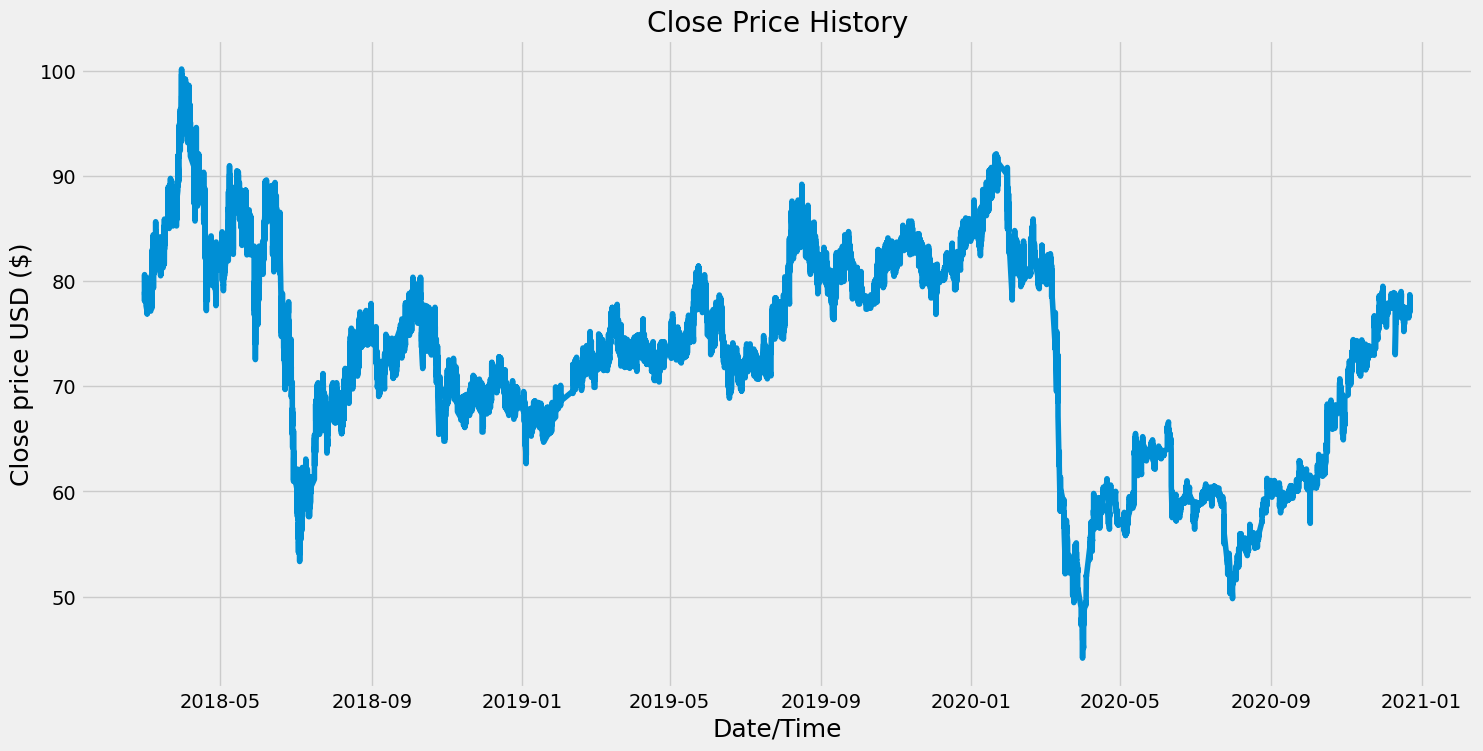

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date/Time', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.show()

In [ ]:
#Create a new dataframe with only 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

100248

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.62209925],
       [0.62120671],
       [0.6069261 ],
       ...,
       [0.60799714],
       [0.60621207],
       [0.60978222]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.62209925, 0.62120671, 0.6069261 , 0.6069261 , 0.6069261 ,
       0.60603356, 0.6069261 , 0.6069261 , 0.61781507, 0.61781507,
       0.61781507, 0.61960014, 0.63887897, 0.61960014, 0.62031417,
       0.61960014, 0.61531596, 0.61103177, 0.65101749, 0.61192431,
       0.61960014, 0.61960014, 0.61960014, 0.61531596, 0.61531596,
       0.61531596, 0.61531596, 0.64584077, 0.61192431, 0.61031774,
       0.60942521, 0.60853267, 0.61031774, 0.60942521, 0.61031774,
       0.61031774, 0.63887897, 0.60853267, 0.61531596, 0.61103177,
       0.61531596, 0.61531596, 0.61960014, 0.61960014, 0.61960014,
       0.6162085 , 0.6162085 , 0.61710104, 0.6162085 , 0.6162085 ,
       0.61531596, 0.61531596, 0.64584077, 0.61710104, 0.61531596,
       0.61370939, 0.61370939, 0.61103177, 0.61531596, 0.61531596])]
[0.6153159585862193]

[array([0.62209925, 0.62120671, 0.6069261 , 0.6069261 , 0.6069261 ,
       0.60603356, 0.6069261 , 0.6069261 , 0.61781507, 0.61781507,
       0.61781507, 0.61960014, 0.638

In [ ]:
#Convert the x_train, y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(100188, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

100188/100188 [==============================] - 761s 8ms/step - loss: 2.3844e-04


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

784/784 [==============================] - 4s 4ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.014057565768772259

<ipython-input-24-9c5d029f1c68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


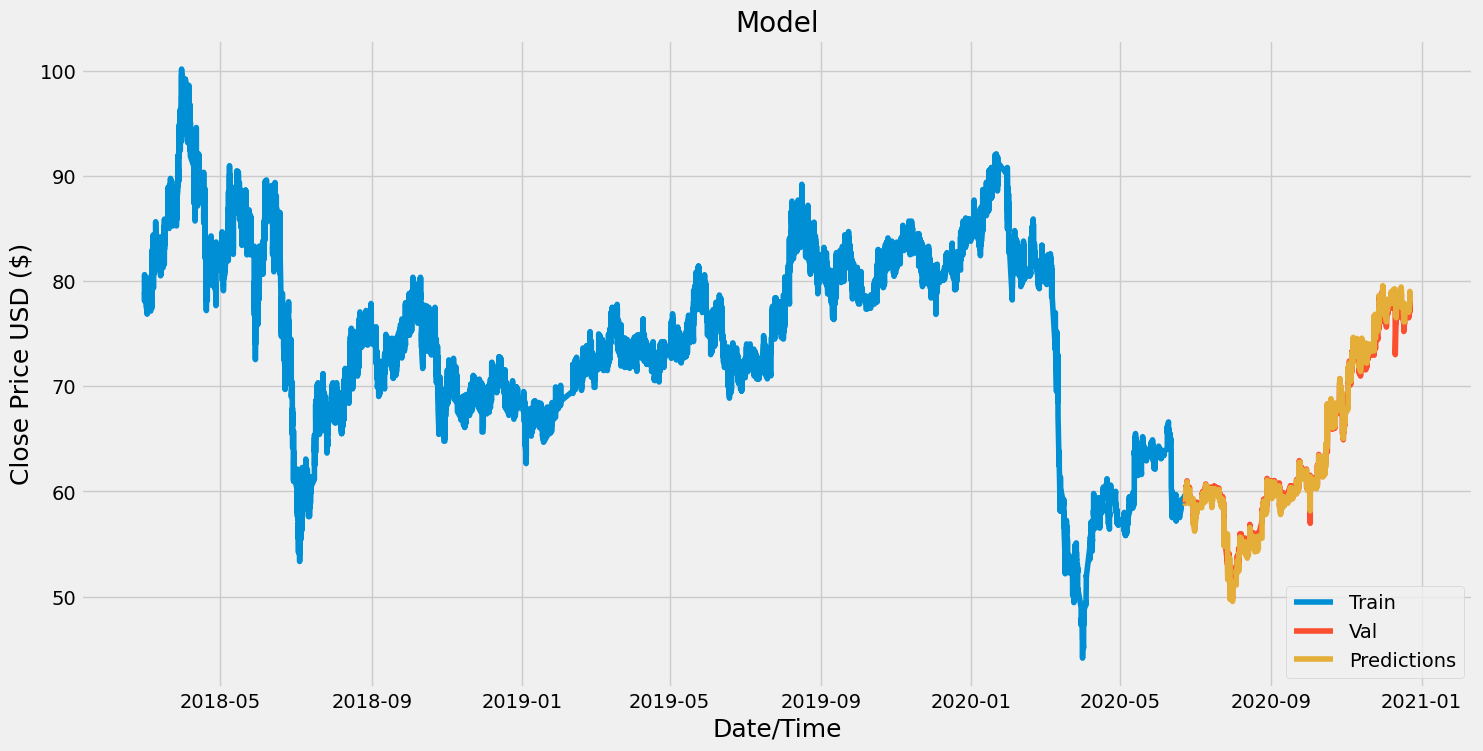

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date/Time', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted price
valid

,Close,Predictions
Date/Time,,
2020-06-22 14:29:00,59.0,58.856590
2020-06-22 14:46:00,59.1,58.847618
2020-06-23 09:15:00,59.5,58.880478
2020-06-23 09:16:00,59.1,59.054985
2020-06-23 09:18:00,59.4,59.014435
...,...,...
2020-12-22 14:22:00,78.2,78.692940
2020-12-22 14:23:00,78.2,78.682388
2020-12-22 14:24:00,78.2,78.673660
